In [1]:
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Overview about data

In [4]:
df_train = pd.read_csv('../data/raw_data.csv', low_memory=False)

In [5]:
df_train.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x25fd5,1
Customer_ID,100000,12500,CUS_0x942c,8
Month,100000,8,January,12500
Name,90015,10139,Stevex,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [7]:
df_train.duplicated().sum()

np.int64(0)

In [8]:
df_train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [9]:
df_train.isna().sum(axis=1).max()

np.int64(5)

In [10]:
df_train[df_train.isna().sum(axis=1)==5]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
896,0x1b42,CUS_0x365a,January,NaN,54,026-57-5729,Scientist,41345.58,NaN,0,...,_,646.47,23.041951,NaN,No,0.0,NaN,Low_spent_Small_value_payments,187.93428046477558,Standard
4490,0x3050,CUS_0x3019,March,NaN,51,346-10-4963,Writer,99007.68,8223.64,7,...,_,31.89,26.221277,NaN,No,0.0,NaN,High_spent_Small_value_payments,750.5733017643256,Good
7012,0x3f16,CUS_0x6171,May,NaN,52,584-89-4764,_______,149168.88,NaN,3,...,Good,903.48,43.610090,NaN,No,0.0,NaN,High_spent_Small_value_payments,1239.9888997857151,Good
56818,0x162ec,CUS_0x9ee4,March,NaN,7919,425-72-7007,Manager,102745.4,NaN,4,...,_,465.88,31.721489,NaN,No,0.0,NaN,High_spent_Large_value_payments,1036.0588129965113,Good
69031,0x1aa79,CUS_0x4eae,August,NaN,37,#F%$D@*&8,_______,44968.15,NaN,1,...,Good,871.85,34.451661,NaN,No,0.0,86.31346044034277,High_spent_Large_value_payments,506.52112289299055,Good
76326,0x1d538,CUS_0xa2ca,July,NaN,37,225-27-1573,Developer,37475.07,NaN,3,...,Good,437.45_,26.222415,NaN,No,0.0,42.17219171407305,High_spent_Large_value_payments,505.220058285927,Good
92669,0x234fb,CUS_0x4203,June,NaN,42,857-44-8236,Musician,39649.74,NaN,5,...,Good,1338.65,40.444954,NaN,No,0.0,401.81986192160866,Low_spent_Small_value_payments,195.99463807839143,Standard


Có nhiều nhất 5 cột chứa NaN trên 1 dòng, mà các dòng này có Customer_ID khác nhau nên có thể fillable

In [11]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

| No | INPUTS                  | Mô tả                                                                 |
|:----|:------------------------|:----------------------------------------------------------------------|
| 1  | id                      | Mã định danh duy nhất cho mỗi bản ghi.                                |
| 2  | customer_id             | Mã định danh duy nhất cho mỗi khách hàng.                             |
| 3  | month                   | Tháng phát sinh giao dịch hoặc bản ghi.                                |
| 4  | name                    | Tên của khách hàng.                                                   |
| 5  | age                     | Tuổi của khách hàng.                                                  |
| 6  | ssn                     | Số an sinh xã hội của khách hàng.                                      |
| 7  | occupation              | Nghề nghiệp của khách hàng.                                           |
| 8  | annual_income           | Thu nhập hàng năm của khách hàng.                                      |
| 9  | monthly_inhand_salary   | Lương thực nhận hàng tháng của khách hàng.                             |
| 10 | num_bank_accounts       | Tổng số tài khoản ngân hàng mà khách hàng sở hữu.                      |
| 11 | num_credit_card         | Tổng số thẻ tín dụng mà khách hàng có.                                |
| 12 | interest_rate           | Lãi suất áp dụng cho các khoản vay hoặc tín dụng.                      |
| 13 | num_of_loan             | Số lượng khoản vay mà khách hàng đã vay.                              |
| 14 | type_of_loan            | Các loại khoản vay mà khách hàng đã vay.                              |
| 15 | delay_from_due_date     | Số ngày trễ hạn thanh toán so với ngày đến hạn.                       |
| 16 | num_of_delayed_payment  | Tổng số lần khách hàng thanh toán trễ hạn.                            |
| 17 | changed_credit_limit    | Số lần điều chỉnh hạn mức tín dụng của khách hàng.                    |
| 18 | num_credit_inquiries    | Số lần tra cứu thông tin tín dụng của khách hàng.                     |
| 19 | credit_mix              | Sự đa dạng các loại tín dụng mà khách hàng đang sử dụng (vay, thẻ tín dụng).|
| 20 | outstanding_debt        | Tổng số nợ mà khách hàng hiện đang nợ.                                |
| 21 | credit_utilization_ratio| Tỷ lệ sử dụng tín dụng so với hạn mức tín dụng hiện có.               |
| 22 | credit_history_age      | Thời gian lịch sử tín dụng của khách hàng.                            |
| 23 | payment_of_min_amount   | Khách hàng có thanh toán số tiền tối thiểu hàng tháng hay không.       |
| 24 | total_emi_per_month     | Tổng số tiền trả góp hàng tháng (EMI) mà khách hàng phải trả.          |
| 25 | amount_invested_monthly | Số tiền đầu tư hàng tháng của khách hàng.                             |
| 26 | payment_behaviour       | Thói quen và hành vi thanh toán của khách hàng.                        |
| 27 | monthly_balance         | Số dư còn lại trong tài khoản của khách hàng vào cuối mỗi tháng.       |
| 28 | credit_score            | Điểm tín dụng của khách hàng (biến mục tiêu: "Good," "Poor," "Standard").|


### Preprocessing

#### Df1

In [12]:
columns_to_use = ["ID", "Customer_ID", "Month", "Name", "Age","Credit_History_Age", "SSN", "Occupation",
    "Annual_Income", "Monthly_Inhand_Salary", "Total_EMI_per_month"]

df1 = pd.read_csv(r'../data/raw_data.csv', usecols=columns_to_use)
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Credit_History_Age,Total_EMI_per_month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,22 Years and 1 Months,49.574949
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,NaN,49.574949
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,22 Years and 3 Months,49.574949
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,22 Years and 4 Months,49.574949
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,22 Years and 5 Months,49.574949


In [13]:
df1.columns = [column.lower() for column in df1.columns]

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100000 non-null  object 
 1   customer_id            100000 non-null  object 
 2   month                  100000 non-null  object 
 3   name                   90015 non-null   object 
 4   age                    100000 non-null  object 
 5   ssn                    100000 non-null  object 
 6   occupation             100000 non-null  object 
 7   annual_income          100000 non-null  object 
 8   monthly_inhand_salary  84998 non-null   float64
 9   credit_history_age     90970 non-null   object 
 10  total_emi_per_month    100000 non-null  float64
dtypes: float64(2), object(9)
memory usage: 8.4+ MB


In [15]:
df1.describe()

,monthly_inhand_salary,total_emi_per_month
count,84998.000000,100000.000000
mean,4194.170850,1403.118217
std,3183.686167,8306.041270
min,303.645417,0.000000
25%,1625.568229,30.306660
50%,3093.745000,69.249473
75%,5957.448333,161.224249
max,15204.633333,82331.000000


In [16]:
df1.describe(include='object')

,id,customer_id,month,name,age,ssn,occupation,annual_income,credit_history_age
count,100000,100000,100000,90015,100000,100000,100000,100000,90970
unique,100000,12500,8,10139,1788,12501,16,18940,404
top,0x25fd5,CUS_0x942c,January,Stevex,38,#F%$D@*&8,_______,36585.12,15 Years and 11 Months
freq,1,8,12500,44,2833,5572,7062,16,446


In [17]:
df1.duplicated().sum()

np.int64(0)

In [18]:
df1['customer_id'].value_counts()

customer_id
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0x1d18    8
             ..
CUS_0x4157    8
CUS_0x5407    8
CUS_0x284a    8
CUS_0x95ee    8
CUS_0x1cdb    8
Name: count, Length: 12500, dtype: int64

In [19]:
all(df1['customer_id'].value_counts()==8)

True

Mỗi khách hàng đều xuất hiện 8 lần trong dữ liệu 

In [20]:
df1.groupby('customer_id')['month'].count()

customer_id
CUS_0x1000    8
CUS_0x1009    8
CUS_0x100b    8
CUS_0x1011    8
CUS_0x1013    8
             ..
CUS_0xff3     8
CUS_0xff4     8
CUS_0xff6     8
CUS_0xffc     8
CUS_0xffd     8
Name: month, Length: 12500, dtype: int64

In [21]:
all(df1.groupby('customer_id')['month'].count()==8)

True

Mỗi khác hàng đều có 8 tháng trong dữ liệu

In [22]:
df1.groupby('customer_id')['month'].unique()

customer_id
CUS_0x1000    [January, February, March, April, May, June, J...
CUS_0x1009    [January, February, March, April, May, June, J...
CUS_0x100b    [January, February, March, April, May, June, J...
CUS_0x1011    [January, February, March, April, May, June, J...
CUS_0x1013    [January, February, March, April, May, June, J...
                                    ...                        
CUS_0xff3     [January, February, March, April, May, June, J...
CUS_0xff4     [January, February, March, April, May, June, J...
CUS_0xff6     [January, February, March, April, May, June, J...
CUS_0xffc     [January, February, March, April, May, June, J...
CUS_0xffd     [January, February, March, April, May, June, J...
Name: month, Length: 12500, dtype: object

In [23]:
filtered_df = df1.groupby('customer_id')['month'].unique()

all(filtered_df.apply(lambda x: set(x) == set(filtered_df.iloc[0])))

True

Tất cả các tháng của mỗi khách hàng xuất hiện trong dữ liệu là giống nhau.

##### name

In [24]:
df1['name'].isna().sum()

np.int64(9985)

In [25]:
df1['name'] = df1.groupby('customer_id')['name'].transform(lambda x: x.fillna(x.mode()[0]))

all(df1.groupby('customer_id')['name'].count() == 8)

True

##### Age

In [26]:
df1['age']

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: age, Length: 100000, dtype: object

In [27]:
df1[pd.to_numeric(df1['age'], errors='coerce').isna()]['age'].head(20)

8      28_
54     34_
58     30_
71     24_
89     33_
97     35_
123    30_
184    31_
227    40_
236    37_
240    54_
256    21_
277    37_
311    37_
326    33_
359    20_
381    30_
387    43_
399    38_
524    18_
Name: age, dtype: object

In [28]:
df1["age"] = df1["age"].str.strip("_")

df1["age"] = pd.to_numeric(df1["age"], downcast="integer")

df1["age"].dtype

dtype('int16')

In [29]:
df1['age'].value_counts().sort_index().head(20)

age
-500     886
 14     1175
 15     1574
 16     1455
 17     1502
 18     2385
 19     2793
 20     2744
 21     2716
 22     2785
 23     2654
 24     2714
 25     2861
 26     2945
 27     2859
 28     2968
 29     2735
 30     2727
 31     2955
 32     2884
Name: count, dtype: int64

In [30]:
df1['age'].value_counts().sort_index().tail(20)

age
8587    1
8592    2
8608    1
8616    2
8623    1
8628    1
8632    1
8639    2
8640    1
8643    1
8655    1
8662    1
8663    1
8666    1
8669    1
8674    1
8678    1
8682    1
8697    1
8698    1
Name: count, dtype: int64

In [31]:
count_age = df1['age'].value_counts().sort_index()
count_age[(0 < count_age.index) & (count_age.index < 100)]

age
14    1175
15    1574
16    1455
17    1502
18    2385
19    2793
20    2744
21    2716
22    2785
23    2654
24    2714
25    2861
26    2945
27    2859
28    2968
29    2735
30    2727
31    2955
32    2884
33    2543
34    2837
35    2866
36    2868
37    2742
38    2994
39    2846
40    2609
41    2785
42    2577
43    2734
44    2824
45    2642
46    1621
47    1227
48    1385
49    1375
50    1273
51    1291
52    1356
53    1354
54    1311
55    1366
56     362
95       3
99       1
Name: count, dtype: int64

Các giá trị có rất nhiều giá trị, chỉ có từ 95 trở đi thì có 3 giá trị, suy ra đây là giá trị lỗi.

In [32]:
df1.loc[(df1['age'] < 14) | (df1['age'] > 56), 'age'] = np.nan

In [33]:
df1['age'] = df1.groupby('customer_id')['age'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df1['age'].isna().sum()

/tmp/ipykernel_41511/1709874177.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['age'] = df1.groupby('customer_id')['age'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


np.int64(0)

Vì là dữ liệu vay tiền nên cần loại đi những khách hàng có tuổi nhỏ hơn 16. Độ tuổi chưa đủ năng lực pháp lý.

Do đây là dữ liệu transcation nên customer_id có thể có giá trị ở nhiều thời điểm khác nhau vì thế nên age cũng khác nhau. nên không thể loại theo cách df1[df1['age'] > 16] mà phải lọc theo customer_id

In [34]:
drop_age = df1[df1['age'] < 16]['customer_id']
df1=df1[~df1['customer_id'].isin(drop_age)]

##### Credit_history_age

In [35]:
df1['credit_history_age'].value_counts(dropna=False).head(20)

credit_history_age
NaN                       8724
17 Years and 11 Months     435
19 Years and 4 Months      432
15 Years and 11 Months     432
19 Years and 3 Months      431
19 Years and 5 Months      428
17 Years and 10 Months     427
17 Years and 9 Months      423
15 Years and 10 Months     418
18 Years and 2 Months      418
18 Years and 3 Months      417
15 Years and 9 Months      416
18 Years and 4 Months      412
18 Years and 11 Months     408
17 Years and 8 Months      404
19 Years and 9 Months      402
18 Years and 10 Months     400
18 Years and 5 Months      399
16 Years and 2 Months      399
15 Years and 8 Months      398
Name: count, dtype: int64

In [37]:
#Calculate the month from the entire string
def convert_age_to_months(history_age):
    if pd.notna(history_age):  # NaN checking
        match = re.match(r"(\d+) Years\s*and\s*(\d+) Months", history_age)  # Regex 
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            total_months = years * 12 + months
            return total_months
    return np.nan

In [38]:
df1["credit_history_age_regulated"] = df1["credit_history_age"].transform(
    convert_age_to_months)

Authorized User là người được thêm vào thẻ tín dụng của người khác (thường là cha mẹ).

Các tổ chức tín dụng và ngân hàng cho phép thêm authorized user từ 13 tuổi trở lên

Vì vậy mà tuổi hiện tại - tuổi credit phải >= 13 tuổi.

In [39]:
df1[(df1['age']*12 - df1['credit_history_age_regulated']) < 13*12]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,credit_history_age_regulated
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,22 Years and 1 Months,49.574949,265.0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,22 Years and 3 Months,49.574949,267.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,22 Years and 4 Months,49.574949,268.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,22 Years and 5 Months,49.574949,269.0
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,22 Years and 6 Months,49.574949,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,31 Years and 6 Months,35.104023,378.0
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,31 Years and 7 Months,35.104023,379.0
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,31 Years and 8 Months,35.104023,380.0
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,31 Years and 9 Months,35.104023,381.0


Ở dữ liệu ban đầu có 100000 bản ghi mà dữ liệu trên có 37137 bản ghi chiếm khoảng 37%. Điều này cho thấy đáng ra những khách hàng có tuổi hiện tại trừ tuổi credit nhỏ hơn 13 tuổi tức là không thỏa mãn.

ở đây cũng có thể nhìn thấy khách hàng mới 23 tuổi nhưng đã có 22 years and 6 months. Điều này là vô lý. sauy ra có thể do sai sót khi nhập liệu. Có thể đây là 22 months and 6 weeks chẳng hạn.

Hãy thử convert thành tuần 

In [40]:
#Calculate the month from the entire string
def convert_age_to_months(history_age):
    if pd.notna(history_age):  # NaN checking
        match = re.match(r"(\d+) Years\s*and\s*(\d+) Months", history_age)  # Regex 
        if match:
            months = int(match.group(1))
            weeks = int(match.group(2))
            total_weeks = months * 4 + weeks 
            return total_weeks
    return np.nan  #Return NaN if there is no match or if it is NaN

In [41]:
df1["credit_history_age_regulated"] = df1["credit_history_age"].transform(
    convert_age_to_months)

difference = 13*52

In [42]:
df1[((df1['age']* 52) - df1['credit_history_age_regulated']) < difference]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,credit_history_age_regulated


cell trên kiểm tra xem có bản ghi nào có tuổi hiện tại trừ đi tuổi credit mà < difference tính theo tuần không. Rất tốt là không có điều này có thể coi như giả định nhập liệu sai của ta ở trên có thể đúng.

In [43]:
df1['credit_history_age'] = df1['credit_history_age_regulated']
df1.drop('credit_history_age_regulated', axis=1, inplace=True)

In [44]:
df1.groupby('customer_id')['credit_history_age'].value_counts(dropna=False).head(20)

customer_id  credit_history_age
CUS_0x1000   42.0                  1
             43.0                  1
             44.0                  1
             45.0                  1
             46.0                  1
             47.0                  1
             48.0                  1
             49.0                  1
CUS_0x1009   124.0                 1
             125.0                 1
             126.0                 1
             127.0                 1
             129.0                 1
             130.0                 1
             131.0                 1
             NaN                   1
CUS_0x100b   63.0                  1
             65.0                  1
             66.0                  1
             67.0                  1
Name: count, dtype: int64

Ta thấy ở mỗi khách hàng có tổi credit tăng dần theo tuần.

In [45]:
tmp_ = df1.groupby('customer_id')['credit_history_age'].value_counts(dropna=False)
tmp_.head()

customer_id  credit_history_age
CUS_0x1000   42.0                  1
             43.0                  1
             44.0                  1
             45.0                  1
             46.0                  1
Name: count, dtype: int64

In [46]:
tmp_.index

MultiIndex([('CUS_0x1000',  42.0),
            ('CUS_0x1000',  43.0),
            ('CUS_0x1000',  44.0),
            ('CUS_0x1000',  45.0),
            ('CUS_0x1000',  46.0),
            ('CUS_0x1000',  47.0),
            ('CUS_0x1000',  48.0),
            ('CUS_0x1000',  49.0),
            ('CUS_0x1009', 124.0),
            ('CUS_0x1009', 125.0),
            ...
            ( 'CUS_0xffc',  58.0),
            ( 'CUS_0xffc',  59.0),
            ( 'CUS_0xffd',  74.0),
            ( 'CUS_0xffd',  75.0),
            ( 'CUS_0xffd',  76.0),
            ( 'CUS_0xffd',  77.0),
            ( 'CUS_0xffd',  78.0),
            ( 'CUS_0xffd',  79.0),
            ( 'CUS_0xffd',  80.0),
            ( 'CUS_0xffd',  81.0)],
           names=['customer_id', 'credit_history_age'], length=94408)

In [47]:
tmp_[tmp_.index.get_level_values(1).isna()]

customer_id  credit_history_age
CUS_0x1009   NaN                   1
CUS_0x100b   NaN                   1
CUS_0x1013   NaN                   1
CUS_0x1015   NaN                   1
CUS_0x1026   NaN                   1
                                  ..
CUS_0xfe5    NaN                   1
CUS_0xfea    NaN                   1
CUS_0xff3    NaN                   1
CUS_0xff4    NaN                   1
CUS_0xffc    NaN                   2
Name: count, Length: 6436, dtype: int64

In [48]:
def fill_nan(group):
    # Loop to fill NaN values từ trên xuống
    for i in range(len(group)):
        if pd.isna(group.loc[group.index[i], "credit_history_age"]):
            if i > 0:
                group.loc[group.index[i], "credit_history_age"] = group.loc[group.index[i-1], "credit_history_age"] + 1
            else:
                group.loc[group.index[i], "credit_history_age"] = np.nan  # Nếu là giá trị đầu tiên

    # Loop để fill NaN còn lại từ dưới lên
    for i in range(len(group) - 1, -1, -1):
        if pd.isna(group.loc[group.index[i], "credit_history_age"]):
            if i < len(group) - 1:
                group.loc[group.index[i], "credit_history_age"] = group.loc[group.index[i+1], "credit_history_age"] - 1

    return group

In [49]:
df1 = df1.groupby("customer_id", group_keys=False).apply(fill_nan)

/tmp/ipykernel_41511/988843339.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1 = df1.groupby("customer_id", group_keys=False).apply(fill_nan)


In [50]:
df1.groupby("customer_id")["credit_history_age"].value_counts(
    dropna=False).sort_index().head(20)

customer_id  credit_history_age
CUS_0x1000   42.0                  1
             43.0                  1
             44.0                  1
             45.0                  1
             46.0                  1
             47.0                  1
             48.0                  1
             49.0                  1
CUS_0x1009   124.0                 1
             125.0                 1
             126.0                 1
             127.0                 1
             128.0                 1
             129.0                 1
             130.0                 1
             131.0                 1
CUS_0x100b   63.0                  1
             64.0                  1
             65.0                  1
             66.0                  1
Name: count, dtype: int64

##### SSN

In [52]:
df1.ssn.value_counts()

ssn
#F%$D@*&8      5370
487-63-4849       8
341-94-4616       8
940-15-4402       8
016-90-7822       8
               ... 
642-73-7670       4
856-06-6147       4
838-33-4811       4
331-28-1921       4
753-72-2651       4
Name: count, Length: 12088, dtype: int64

In [53]:
df1.loc[df1["ssn"] == "#F%$D@*&8", "ssn"] = pd.NA

df1["ssn"] = df1.groupby("customer_id")["ssn"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

df1["ssn"].isna().sum()

/tmp/ipykernel_41511/1415374695.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method="ffill").fillna(method="bfill"))


np.int64(0)

##### occupation

In [54]:
df1.occupation.value_counts()

occupation
_______          6831
Lawyer           6381
Architect        6188
Engineer         6127
Accountant       6068
Scientist        6066
Developer        6062
Mechanic         6059
Media_Manager    6004
Teacher          5967
Journalist       5958
Entrepreneur     5933
Doctor           5890
Musician         5739
Manager          5727
Writer           5696
Name: count, dtype: int64

In [55]:
df1.groupby("customer_id")["occupation"].value_counts().head(30)

customer_id  occupation   
CUS_0x1000   Lawyer           8
CUS_0x1009   Mechanic         7
             _______          1
CUS_0x100b   Media_Manager    8
CUS_0x1011   Doctor           8
CUS_0x1013   Mechanic         8
CUS_0x1015   Journalist       8
CUS_0x1026   Manager          7
             _______          1
CUS_0x102d   Entrepreneur     7
             _______          1
CUS_0x102e   Scientist        8
CUS_0x1032   Lawyer           8
CUS_0x1037   Accountant       8
CUS_0x1038   Architect        8
CUS_0x103e   Scientist        8
CUS_0x1044   Entrepreneur     7
             _______          1
CUS_0x1048   Accountant       8
CUS_0x104a   Mechanic         8
CUS_0x104e   Teacher          7
             _______          1
CUS_0x104f   Architect        7
             _______          1
CUS_0x1051   Engineer         7
             _______          1
CUS_0x1056   Entrepreneur     8
CUS_0x1057   Writer           7
             _______          1
CUS_0x105b   Accountant       7
Name: count, 

In [56]:
df1["occupation"] = df1.groupby("customer_id")["occupation"].transform(
    lambda x: x.where(x != "_______", x[x != "_______"].mode()[0]))

print(df1["occupation"].value_counts())

occupation
Lawyer           6888
Architect        6648
Engineer         6616
Developer        6536
Mechanic         6528
Accountant       6520
Scientist        6496
Media_Manager    6472
Teacher          6408
Journalist       6400
Entrepreneur     6392
Doctor           6352
Manager          6168
Musician         6168
Writer           6104
Name: count, dtype: int64


In [57]:
(df1.groupby("customer_id")["occupation"].nunique() == 1).sum()

np.int64(12087)

##### monthly_inhand_salary

In [58]:
df1["monthly_inhand_salary"]

0        1824.843333
1                NaN
2                NaN
3                NaN
4        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: monthly_inhand_salary, Length: 96696, dtype: float64

In [59]:
df1["monthly_inhand_salary"].value_counts(dropna=False)

monthly_inhand_salary
NaN             14486
6769.130000        15
2295.058333        15
6082.187500        15
6358.956667        15
                ...  
2728.017745         1
2671.207498         1
5081.452604         1
11102.135322        1
1069.950000         1
Name: count, Length: 12799, dtype: int64

In [60]:
df1["monthly_inhand_salary"] = df1.groupby(
    "customer_id")["monthly_inhand_salary"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))

df1["monthly_inhand_salary"].isna().sum()

/tmp/ipykernel_41511/4243933595.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method="ffill").fillna(method="bfill"))


np.int64(0)

##### annual_income

In [61]:
df1[pd.to_numeric(df1["annual_income"],
                  errors="coerce").isna()]["annual_income"].head(20)

10      34847.84_
27      30689.89_
32      35547.71_
56      34081.38_
66     114838.41_
94      88640.24_
98      54392.16_
106     8701.545_
111     8701.545_
115     25546.26_
129     92047.08_
151     97791.42_
175    10183.015_
180    106733.13_
188    12600.445_
197     57983.12_
214     34290.12_
217     43070.24_
231    6515990.0_
235     39641.54_
Name: annual_income, dtype: object

In [62]:
df1["annual_income"] = df1["annual_income"].str.strip("_")

df1["annual_income"] = pd.to_numeric(df1["annual_income"], downcast="integer")

df1["annual_income"].dtype

dtype('float64')

In [63]:
df1.groupby("customer_id")["annual_income"].unique().sample(20)

customer_id
CUS_0x5c60     [19266.77]
CUS_0x1414     [51093.12]
CUS_0x205f     [34361.32]
CUS_0x956d    [140254.28]
CUS_0xc632     [33376.81]
CUS_0x83d7     [21709.07]
CUS_0x3e83     [33857.41]
CUS_0x9cc3     [48657.42]
CUS_0x1fbe     [29482.06]
CUS_0x5b0d     [14433.94]
CUS_0xe10      [81126.78]
CUS_0x5215      [71285.0]
CUS_0x41e7     [60574.48]
CUS_0xc4c3     [32276.42]
CUS_0x2f03      [61435.6]
CUS_0x8b2c      [71479.6]
CUS_0x413      [41806.16]
CUS_0x4ac9     [95332.23]
CUS_0x96b3     [61181.88]
CUS_0x75fd     [13180.99]
Name: annual_income, dtype: object

In [64]:
filter_df = df1.groupby("customer_id")["annual_income"].unique()
filter_df[filter_df.apply(lambda x: len(x) > 1)]

customer_id
CUS_0x1057     [86617.16, 1105753.0]
CUS_0x108a    [36982.36, 11641815.0]
CUS_0x10a9    [17603.265, 9032145.0]
CUS_0x10b6     [23627.63, 5691341.0]
CUS_0x10dd     [7572168.0, 105645.6]
                       ...          
CUS_0xe5b     [43568.84, 17488375.0]
CUS_0xee1     [14630332.0, 17116.55]
CUS_0xf20     [58063.48, 20189519.0]
CUS_0xf55     [78443.48, 20350298.0]
CUS_0xfa4      [15035.19, 7711339.0]
Name: annual_income, Length: 937, dtype: object

In [65]:
df1[df1['customer_id'].isin(filter_df[filter_df.apply(lambda x: len(x) > 1)].index)].head(20)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month
48,0x164a,CUS_0x284a,January,Nadiaq,33.0,411-51-0676,Lawyer,131313.40,11242.783333,127.0,137.644605
49,0x164b,CUS_0x284a,February,Nadiaq,34.0,411-51-0676,Lawyer,131313.40,11242.783333,128.0,137.644605
50,0x164c,CUS_0x284a,March,Nadiaq,34.0,411-51-0676,Lawyer,131313.40,10469.207759,129.0,911.220179
51,0x164d,CUS_0x284a,April,Nadiaq,34.0,411-51-0676,Lawyer,131313.40,10469.207759,130.0,23834.000000
52,0x164e,CUS_0x284a,May,Nadiaq,34.0,411-51-0676,Lawyer,131313.40,10469.207759,131.0,32662.000000
53,0x164f,CUS_0x284a,June,Nadiaq,34.0,411-51-0676,Lawyer,131313.40,10469.207759,124.0,911.220179
54,0x1650,CUS_0x284a,July,Nadiaq,34.0,411-51-0676,Lawyer,10909427.00,10469.207759,125.0,911.220179
55,0x1651,CUS_0x284a,August,Nadiaq,34.0,411-51-0676,Lawyer,131313.40,10469.207759,126.0,911.220179
224,0x1752,CUS_0xbffe,January,Dhanya Skariachano,40.0,311-13-7309,Architect,28572.39,2210.032500,123.0,69.602920
225,0x1753,CUS_0xbffe,February,Dhanya Skariachano,40.0,311-13-7309,Architect,28572.39,2210.032500,124.0,69.602920


In [66]:
# Tìm mode của annual_income theo customer_id
mode_income = df1.groupby('customer_id')['annual_income'].agg(lambda x: x.mode().iloc[0])

# Thay những giá trị khác mode bằng mode
df1['annual_income'] = df1.apply(
    lambda row: mode_income[row['customer_id']] if row['annual_income'] != mode_income[row['customer_id']] else row['annual_income'],
    axis=1
)

##### total_emi_per_month

In [67]:
#The value of total_emi_per_month is typically around 30%-40% of the monthly income.
df1.loc[df1["total_emi_per_month"] > df1["monthly_inhand_salary"] *
        0.3].count()

id                       3041
customer_id              3041
month                    3041
name                     3041
age                      3041
ssn                      3041
occupation               3041
annual_income            3041
monthly_inhand_salary    3041
credit_history_age       3041
total_emi_per_month      3041
dtype: int64

In [68]:
df1.loc[df1["total_emi_per_month"] > df1["monthly_inhand_salary"] *
        0.3].groupby(["customer_id"
                      ])[["monthly_inhand_salary",
                          "total_emi_per_month"]].value_counts().head(20)

customer_id  monthly_inhand_salary  total_emi_per_month
CUS_0x1013   7962.415000            48538.0                1
CUS_0x103e   8262.233333            27369.0                1
CUS_0x105b   2575.017500            79286.0                1
CUS_0x1069   4799.445000            10251.0                1
CUS_0x106f   11102.590000           60413.0                1
CUS_0x1098   1468.081667            49236.0                1
CUS_0x109b   2610.827500            58850.0                1
CUS_0x10b3   11127.883333           52503.0                1
CUS_0x10b6   1712.969167            37404.0                1
CUS_0x10c5   13180.596667           53804.0                1
CUS_0x10d7   1380.678333            11569.0                1
CUS_0x10df   828.436250             1436.0                 1
CUS_0x1119   4593.825000            65629.0                1
CUS_0x1135   6896.525000            47946.0                1
CUS_0x114b   9104.580000            53636.0                1
CUS_0x1152   2510.705833     

In [69]:
df1.loc[df1["total_emi_per_month"] > df1["monthly_inhand_salary"] * 0.3,
        "total_emi_per_month"] = np.nan

df1["total_emi_per_month"] = df1.groupby(
    "customer_id")["total_emi_per_month"].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

df1["total_emi_per_month"].isna().sum()

np.int64(0)

In [71]:
filtered_df = df1.groupby(
    "customer_id")["total_emi_per_month"].nunique().loc[lambda x: x > 1].index

df1[df1["customer_id"].isin(filtered_df)].groupby(
    "customer_id")["total_emi_per_month"].value_counts().head(20)

customer_id  total_emi_per_month
CUS_0x105b   0.000000               5
             285.423800             3
CUS_0x106f   143.483732             7
             1357.000000            1
CUS_0x1075   43.385046              4
             196.027162             4
CUS_0x108a   454.419552             6
             200.370042             2
CUS_0x10a9   0.000000               5
             102.992772             3
CUS_0x10f9   0.000000               7
             1494.838012            1
CUS_0x1130   988.448091             5
             0.000000               3
CUS_0x1134   76.539303              7
             29.035514              1
CUS_0x1168   96.749710              7
             1950.000000            1
CUS_0x1182   301.843757             4
             1169.809116            4
Name: count, dtype: int64

In [72]:
#More than 1 unique total_emi_per_month and their value_counts
filtered_df = df1[df1["customer_id"].isin(filtered_df)].groupby(
    "customer_id")["total_emi_per_month"].value_counts()

for (customer_id, emi_value), count in filtered_df.items():
    # Check if the count of total_emi_per_month is 1
    if count == 1:
        # Extract total_emi_per_month values for the current customer_id
        customer_data = df1[df1["customer_id"] ==
                            customer_id]["total_emi_per_month"]

        # Check if the current emi_value is not the first or last value
        if not (emi_value == customer_data.iloc[0]
                or emi_value == customer_data.iloc[-1]):
            # Get the mode value
            mode_value = customer_data.mode()
            # Replace the emi_value with the mode
            df1.loc[(df1["customer_id"] == customer_id) &
                    (df1["total_emi_per_month"] == emi_value),
                    "total_emi_per_month"] = mode_value[0]

In [73]:
df1.total_emi_per_month.value_counts().sort_values().head(20)

total_emi_per_month
152.557166    1
129.035750    1
182.739733    1
45.355560     1
203.355777    1
176.518429    1
950.312352    1
199.393603    1
37.669844     1
20.289966     1
157.760530    1
394.861724    1
65.317609     1
37.933167     1
94.861737     1
142.575851    1
83.395483     1
660.808744    1
25.229572     1
242.612857    1
Name: count, dtype: int64

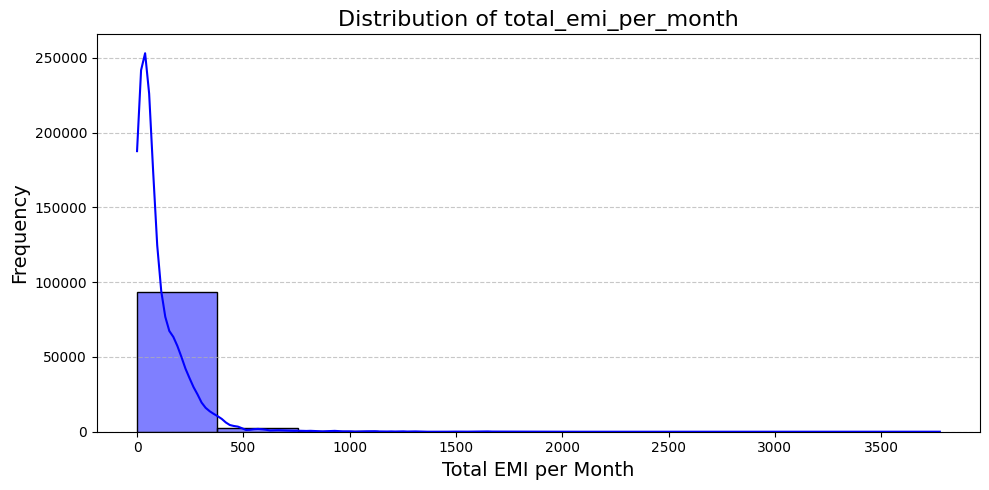

In [74]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df1, x="total_emi_per_month", bins=10, kde=True, color='blue')

plt.title('Distribution of total_emi_per_month', fontsize=16)
plt.xlabel('Total EMI per Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Df2

In [77]:
columns_to_use = [
    "Customer_ID", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
    "Num_of_Loan", "Type_of_Loan", "Delay_from_due_date",
    "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries",
    "Credit_Mix", "Outstanding_Debt"
]

df2 = pd.read_csv(r"../data/raw_data.csv", usecols=columns_to_use)

df2.head(10)

,Customer_ID,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
0,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98
1,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98
2,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98
3,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98
4,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98
5,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98
6,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98
7,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98
8,CUS_0x21b1,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03
9,CUS_0x21b1,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03


In [78]:
df2.columns = [column.lower() for column in df2.columns]

In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             100000 non-null  object 
 1   num_bank_accounts       100000 non-null  int64  
 2   num_credit_card         100000 non-null  int64  
 3   interest_rate           100000 non-null  int64  
 4   num_of_loan             100000 non-null  object 
 5   type_of_loan            88592 non-null   object 
 6   delay_from_due_date     100000 non-null  int64  
 7   num_of_delayed_payment  92998 non-null   object 
 8   changed_credit_limit    100000 non-null  object 
 9   num_credit_inquiries    98035 non-null   float64
 10  credit_mix              100000 non-null  object 
 11  outstanding_debt        100000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 9.2+ MB


##### num_bank_accounts

In [80]:
df2["num_bank_accounts"].value_counts().sort_index().head(20) 

num_bank_accounts
-1        21
 0      4328
 1      4490
 2      4304
 3     11950
 4     12186
 5     12118
 6     13001
 7     12823
 8     12765
 9      5443
 10     5247
 11        9
 18        1
 26        1
 27        1
 28        3
 29        1
 30        1
 31        1
Name: count, dtype: int64

có một số giá trị bất thường như -1, các gía trị từ 18 trở đi chỉ xuất hiện 1 lần rất ít.

In [81]:
df2[df2['num_bank_accounts'].isin([18, 26, 27, 28, 29, 30, 31])]

,customer_id,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt
12447,CUS_0x18bc,26,4,5,-100,"Personal Loan, and Debt Consolidation Loan",22,NaN,_,7.0,Good,1475.91
18124,CUS_0x4b09,28,7,13,3_,"Mortgage Loan, Credit-Builder Loan, and Person...",25,14,8.33,8.0,Standard,1017.73
21388,CUS_0xaa62,31,5,19,4_,"Payday Loan, Mortgage Loan, Personal Loan, and...",21,15,12.23,6.0,_,2010.92
55871,CUS_0x4ade,28,5,8,4,"Student Loan, Home Equity Loan, Student Loan, ...",1,12,11.01,6.0,_,78.47
57421,CUS_0x5e84,30,7,28,8,"Not Specified, Home Equity Loan, Personal Loan...",27,17,25.93,11.0,Bad,2681.84
58356,CUS_0xa1ce,29,3,19,7,"Not Specified, Not Specified, Mortgage Loan, C...",21,14,16.4,8.0,_,1417.06
69723,CUS_0x7350,28,5,30,4,"Personal Loan, Debt Consolidation Loan, Studen...",30,16,16.98,9.0,Standard,2297.52
73219,CUS_0x39c5,18,9,26,2,"Personal Loan, and Student Loan",32,NaN,7.83,9.0,Bad,1488.01
95861,CUS_0x28f5,27,7,5,4,"Payday Loan, Mortgage Loan, Credit-Builder Loa...",18,13,10.67,3.0,Good,1482.24


In [82]:
df2.loc[(df2["num_bank_accounts"] < 0) | (df2["num_bank_accounts"] > 11),
        "num_bank_accounts", ] = pd.NA

df2["num_bank_accounts"] = df2.groupby(
    "customer_id")["num_bank_accounts"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))

df2["num_bank_accounts"].isna().sum()

/tmp/ipykernel_41511/57338157.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method="ffill").fillna(method="bfill"))


np.int64(0)

##### num_credit_card

In [83]:
df2["num_credit_card"].value_counts().sort_index().head(20)

num_credit_card
0        13
1      2132
2      2149
3     13277
4     14030
5     18459
6     16559
7     16615
8      4956
9      4643
10     4860
11       36
15        3
16        2
17        1
18        1
20        1
21        1
22        2
24        1
Name: count, dtype: int64

Các giá trị từ 15 xuất hiện chỉ một vài lần vì vậy có thể tìm cách thay thế.

In [84]:
df2.loc[df2["num_credit_card"] > 11, "num_credit_card"] = pd.NA

df2["num_credit_card"] = df2.groupby(
    "customer_id")["num_credit_card"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))

df2["num_credit_card"].isna().sum()

/tmp/ipykernel_41511/2577496029.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method="ffill").fillna(method="bfill"))


np.int64(0)

##### interest_rate

In [85]:
df2.interest_rate.value_counts().sort_index().head(40)

interest_rate
1     2683
2     2465
3     2765
4     2589
5     4979
6     4721
7     4494
8     5012
9     4494
10    4540
11    4428
12    4540
13    2384
14    2229
15    3992
16    3730
17    3813
18    4102
19    3630
20    3929
21    1560
22    1720
23    1683
24    1685
25    1566
26    1489
27    1608
28    1616
29    1662
30    1690
31    1457
32    1742
33    1467
34    1502
59       1
60       1
64       1
67       1
73       1
74       1
Name: count, dtype: int64

In [86]:
df2.loc[df2["interest_rate"] > 34, "interest_rate"] = pd.NA

df2["interest_rate"] = df2.groupby("customer_id")["interest_rate"].transform(
    lambda x: x.fillna(x.mode()[0]))

df2["interest_rate"].isna().sum()

np.int64(0)

In [87]:
(df2.groupby("customer_id")["interest_rate"].nunique() == 2).sum()

np.int64(0)

##### num_of_loan

In [88]:
df2[pd.to_numeric(df2["num_of_loan"], errors="coerce").isna()]["num_of_loan"].head(20)

37     0_
80     3_
84     3_
94     2_
119    5_
125    2_
131    0_
144    0_
158    5_
256    2_
360    8_
366    8_
377    2_
382    2_
391    9_
410    5_
442    4_
481    7_
483    7_
486    7_
Name: num_of_loan, dtype: object

In [89]:
df2["num_of_loan"] = df2["num_of_loan"].str.strip("_")

df2["num_of_loan"] = pd.to_numeric(df2["num_of_loan"], downcast="integer")

df2["num_of_loan"].dtype

dtype('int16')

In [90]:
df2["num_of_loan"].value_counts().sort_index().head(20)

num_of_loan
-100     3876
 0      10930
 1      10606
 2      15032
 3      15104
 4      14743
 5       7197
 6       7803
 7       7344
 8       3191
 9       3702
 17         1
 18         1
 19         1
 23         2
 27         1
 29         1
 31         2
 32         1
 33         2
Name: count, dtype: int64

In [91]:
df2.loc[(df2["num_of_loan"] < 0) | (df2["num_of_loan"] > 9),
        "num_of_loan"] = pd.NA

df2["num_of_loan"] = df2.groupby("customer_id")["num_of_loan"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

df2["num_of_loan"].isna().sum()

/tmp/ipykernel_41511/163374721.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method="ffill").fillna(method="bfill"))


np.int64(0)

##### type_of_loan

In [92]:
df2['type_of_loan'].isna().sum()

np.int64(11408)

In [93]:
df2[df2['type_of_loan'].isna()]

,customer_id,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt
32,CUS_0x1cdb,7.0,5.0,5.0,0.0,NaN,5,NaN,2.58,4.0,Standard,943.86
33,CUS_0x1cdb,7.0,5.0,5.0,0.0,NaN,9,NaN,2.58,4.0,Standard,943.86
34,CUS_0x1cdb,7.0,5.0,5.0,0.0,NaN,5,12,2.58,4.0,Standard,943.86
35,CUS_0x1cdb,7.0,5.0,5.0,0.0,NaN,1,15,2.58,4.0,_,943.86
36,CUS_0x1cdb,7.0,5.0,5.0,0.0,NaN,9,17,2.58,4.0,_,943.86
...,...,...,...,...,...,...,...,...,...,...,...,...
99939,CUS_0xad4f,7.0,3.0,9.0,0.0,NaN,27,19_,5.31,2.0,_,642.46
99940,CUS_0xad4f,7.0,3.0,9.0,0.0,NaN,30,18,4.31,2.0,Standard,642.46
99941,CUS_0xad4f,7.0,3.0,9.0,0.0,NaN,27,18,5.31,2.0,Standard,642.46
99942,CUS_0xad4f,6.0,2.0,9.0,0.0,NaN,27,17,1.3099999999999996,2.0,Standard,642.46


Có thể thấy hầu hết những bản ghi có num_of_loan = 0 thì type_of_loan là NaN.

In [94]:
df2.loc[df2["num_of_loan"] == 0, "type_of_loan"] = "No Loan"

In [95]:
df2["type_of_loan"] = df2["type_of_loan"].str.replace(" and", "", regex=False)
df2["type_of_loan"] = df2["type_of_loan"].str.split(", ")

In [96]:
df2["type_of_loan"].value_counts().sample(20)

type_of_loan
[Mortgage Loan, Not Specified, Payday Loan, Debt Consolidation Loan, Mortgage Loan, Home Equity Loan, Home Equity Loan]                                                8
[Home Equity Loan, Payday Loan, Debt Consolidation Loan]                                                                                                              16
[Personal Loan, Payday Loan, Personal Loan]                                                                                                                           24
[Auto Loan, Home Equity Loan, Not Specified, Debt Consolidation Loan, Personal Loan, Payday Loan, Mortgage Loan, Debt Consolidation Loan, Student Loan]                8
[Home Equity Loan, Mortgage Loan, Home Equity Loan, Payday Loan, Not Specified, Credit-Builder Loan, Credit-Builder Loan]                                              8
[Debt Consolidation Loan, Credit-Builder Loan, Credit-Builder Loan, Not Specified, Auto Loan, Personal Loan, Mortgage Loan, Home Equity Loan, 

##### delay_from_due_date

In [97]:
df2.delay_from_due_date.value_counts().sort_index()

delay_from_due_date
-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: count, Length: 73, dtype: int64

In [98]:
def check_consecutive_delays(group):
    # Calculate the consecutive differences
    for i in range(len(group["delay_from_due_date"].values) - 1):
        if (abs(group["delay_from_due_date"].values[i] -
                group["delay_from_due_date"].values[i + 1]) > 30):
            return True
    return False


# Group by customer_id and check
any(df2.groupby("customer_id").apply(check_consecutive_delays))

/tmp/ipykernel_41511/740411280.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  any(df2.groupby("customer_id").apply(check_consecutive_delays))


False

Như vậy không có bản ghi nào có số ngày trả nợ muộn quá 30 ngày.

##### num_of_delayed_payment

In [99]:
df2[pd.to_numeric(df2["num_of_delayed_payment"],
                  errors="coerce").isna()]["num_of_delayed_payment"].head(20)

1      NaN
4      NaN
6       8_
11      3_
30     NaN
32     NaN
33     NaN
53      3_
54      2_
70     NaN
95     NaN
106    NaN
119    13_
124    14_
140    NaN
141    12_
142    NaN
148    NaN
152    NaN
164    NaN
Name: num_of_delayed_payment, dtype: object

In [100]:
df2["num_of_delayed_payment"] = df2["num_of_delayed_payment"].str.strip("_")

df2["num_of_delayed_payment"] = pd.to_numeric(df2["num_of_delayed_payment"],
                                              downcast="integer")

df2["num_of_delayed_payment"].dtype

dtype('float64')

In [101]:
df2[df2["num_of_delayed_payment"].isna()].groupby("customer_id").size()

customer_id
CUS_0x1011    2
CUS_0x1013    1
CUS_0x1018    1
CUS_0x102d    1
CUS_0x102e    1
             ..
CUS_0xfdd     1
CUS_0xfe3     3
CUS_0xfe4     2
CUS_0xff6     1
CUS_0xffd     1
Length: 5465, dtype: int64

In [102]:
df2["num_of_delayed_payment"].value_counts().sort_index().head(50) 

num_of_delayed_payment
-3.0        94
-2.0       234
-1.0       316
 0.0      1609
 1.0      1636
 2.0      1810
 3.0      1931
 4.0      1838
 5.0      2091
 6.0      2321
 7.0      2385
 8.0      4873
 9.0      4981
 10.0     5309
 11.0     4810
 12.0     5059
 13.0     4036
 14.0     4193
 15.0     5237
 16.0     5312
 17.0     5412
 18.0     5216
 19.0     5481
 20.0     5089
 21.0     2553
 22.0     2339
 23.0     2028
 24.0     1701
 25.0     1665
 26.0      322
 27.0      250
 28.0      131
 46.0        1
 47.0        1
 49.0        1
 52.0        1
 72.0        1
 80.0        1
 84.0        1
 85.0        1
 86.0        1
 88.0        1
 94.0        1
 98.0        1
 102.0       1
 106.0       1
 107.0       1
 121.0       1
 130.0       1
 132.0       1
Name: count, dtype: int64

In [103]:
df2.loc[(df2["num_of_delayed_payment"] < 0) |
        (df2["num_of_delayed_payment"] > 28),
        "num_of_delayed_payment", ] = np.nan

df2["num_of_delayed_payment"] = df2.groupby(
    "customer_id")["num_of_delayed_payment"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))

df2["num_of_delayed_payment"].isna().sum()

/tmp/ipykernel_41511/1646480310.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method="ffill").fillna(method="bfill"))


np.int64(0)

##### changed_credit_limit

In [104]:
df2[pd.to_numeric(df2["changed_credit_limit"],
                  errors="coerce").isna()]["changed_credit_limit"].sample(20)

73926    _
32990    _
35857    _
12778    _
52880    _
54745    _
97549    _
2336     _
88597    _
61179    _
31302    _
17229    _
55273    _
75123    _
38081    _
43710    _
92916    _
95252    _
7427     _
55866    _
Name: changed_credit_limit, dtype: object

In [105]:
df2.loc[(df2["changed_credit_limit"] == "_"), "changed_credit_limit"] = np.nan

df2["changed_credit_limit"] = df2.groupby(
    "customer_id")["changed_credit_limit"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))

df2["changed_credit_limit"].isna().sum()

/tmp/ipykernel_41511/3321950268.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method="ffill").fillna(method="bfill"))


np.int64(0)

In [106]:
df2["changed_credit_limit"] = pd.to_numeric(df2["changed_credit_limit"],
                                            downcast="float").round(3)

df2["changed_credit_limit"].dtype

dtype('float32')

##### num_credit_inquiries

In [107]:
df2["num_credit_inquiries"].isna().sum()

np.int64(1965)

In [108]:
df2["num_credit_inquiries"].value_counts(dropna=False).head(30) 

num_credit_inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
8.0        7866
1.0        7588
0.0        6972
5.0        5693
9.0        5283
11.0       5051
10.0       4936
12.0       4571
NaN        1965
13.0       1480
14.0       1039
15.0        808
16.0        456
17.0        284
1460.0        4
53.0          4
318.0         4
1786.0        4
31.0          4
1244.0        4
2297.0        4
2310.0        4
285.0         4
1114.0        4
1768.0        4
Name: count, dtype: int64

In [109]:
df2.loc[(df2["num_credit_inquiries"] > 17), "num_credit_inquiries"] = pd.NA

df2["num_credit_inquiries"] = df2.groupby(
    "customer_id")["num_credit_inquiries"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))

df2["num_credit_inquiries"].isna().sum()

/tmp/ipykernel_41511/3648540683.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method="ffill").fillna(method="bfill"))


np.int64(0)

##### credit_mix

In [110]:
df2.credit_mix.value_counts()

credit_mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [111]:
df2[["customer_id", "credit_mix"]].head(20)

,customer_id,credit_mix
0,CUS_0xd40,_
1,CUS_0xd40,Good
2,CUS_0xd40,Good
3,CUS_0xd40,Good
4,CUS_0xd40,Good
5,CUS_0xd40,Good
6,CUS_0xd40,Good
7,CUS_0xd40,Good
8,CUS_0x21b1,Good
9,CUS_0x21b1,Good


In [112]:
df2.loc[df2["credit_mix"] == "_", "credit_mix"] = pd.NA

df2["credit_mix"] = df2.groupby("customer_id")["credit_mix"].transform(
    lambda x: x.fillna(x.mode()[0]))

df2["credit_mix"].isna().sum()

np.int64(0)

##### outstanding_debt

In [113]:
df2.outstanding_debt.value_counts().sample(20)

outstanding_debt
1852.75     8
1979.39     8
1473.17     8
881.4       8
1390.09     8
1736.21     8
2039.68     8
1248.19     8
1171.11     8
2789.42     8
1989.26     8
760.97      8
1110.5      8
1234.79     8
68.29       8
940.91      8
317.73      8
1460.8      8
129.15     16
1080.17     8
Name: count, dtype: int64

In [114]:
df2[pd.to_numeric(df2["outstanding_debt"],
                  errors="coerce").isna()]["outstanding_debt"].head(20)

87      1328.93_
142     1283.37_
368     2797.17_
632     3818.57_
703      343.84_
731      363.51_
782      404.51_
819     1755.81_
835     2593.44_
992       89.62_
1147    1054.86_
1148    1054.86_
1162    1374.23_
1243    1166.47_
1339     457.81_
1369    1684.06_
1486    1126.35_
1542    2098.83_
1573     761.18_
1633    1343.01_
Name: outstanding_debt, dtype: object

In [115]:
df2["outstanding_debt"] = df2["outstanding_debt"].str.strip("_")
df2["outstanding_debt"] = pd.to_numeric(df2["outstanding_debt"],
                                        downcast="float")
df2["outstanding_debt"].dtype

dtype('float32')

#### Df3

In [116]:
columns_to_use = [
    "Customer_ID",
    "Credit_Utilization_Ratio",
    "Payment_of_Min_Amount",
    "Amount_invested_monthly",
    "Payment_Behaviour",
    "Monthly_Balance",
    "Credit_Score",
]

df3 = pd.read_csv(r"../data/raw_data.csv", usecols=columns_to_use)

df3.head()

/tmp/ipykernel_41511/27509748.py:11: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(r"../data/raw_data.csv", usecols=columns_to_use)


,Customer_ID,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,26.822620,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,31.944960,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,28.609352,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,31.377862,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,24.797347,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [117]:
df3.columns = [column.lower() for column in df3.columns]

In [118]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               100000 non-null  object 
 1   credit_utilization_ratio  100000 non-null  float64
 2   payment_of_min_amount     100000 non-null  object 
 3   amount_invested_monthly   95521 non-null   object 
 4   payment_behaviour         100000 non-null  object 
 5   monthly_balance           98800 non-null   object 
 6   credit_score              100000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.3+ MB


##### Payment _of_Min_Amount



In [119]:
df3.payment_of_min_amount.value_counts(dropna=False)

payment_of_min_amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [120]:
any(df3.groupby("customer_id")["payment_of_min_amount"].nunique() == 3)

False

Không có bất kì customer nào có cả 3 loại là Yes, No, NM

In [121]:
#Thay thế giá trị NM bằng gí trị khác.
df3["payment_of_min_amount"] = df3.groupby(
    "customer_id")["payment_of_min_amount"].transform(
        lambda x: x.replace("NM", x[x != "NM"].iloc[0]))

In [122]:
df3.payment_of_min_amount.value_counts(dropna=False)

payment_of_min_amount
Yes    59432
No     40568
Name: count, dtype: int64

##### amount_invested_monthly

In [123]:
df3[pd.to_numeric(
    df3["amount_invested_monthly"],
    errors="coerce").isna()]["amount_invested_monthly"].value_counts(
        dropna=False)

amount_invested_monthly
NaN          4479
__10000__    4305
Name: count, dtype: int64

In [124]:
df3["amount_invested_monthly"] = df3["amount_invested_monthly"].str.strip("_")
df3["amount_invested_monthly"] = pd.to_numeric(df3["amount_invested_monthly"],
                                               downcast="float")
df3["amount_invested_monthly"].dtype

dtype('float32')

In [125]:
df3.amount_invested_monthly.value_counts(dropna=False).head(20)

amount_invested_monthly
NaN             4479
10000.000000    4305
0.000000         169
56.584618          2
105.325279         2
257.395691         2
174.601471         2
133.477356         2
154.766571         2
278.636566         2
536.648132         2
314.737213         2
163.614243         2
146.224899         2
576.811584         2
25.415653          2
43.304020          2
42.652752          2
289.631561         2
70.798302          2
Name: count, dtype: int64

In [126]:
df3.groupby("customer_id")["amount_invested_monthly"].apply(
    lambda x: x.isna().all()).sum()

np.int64(0)

In [127]:
df3["amount_invested_monthly"] = df3.groupby(
    "customer_id")["amount_invested_monthly"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))

df3["amount_invested_monthly"].isna().sum()

/tmp/ipykernel_41511/3995203563.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method="ffill").fillna(method="bfill"))


np.int64(0)

##### payment_behaviour

In [128]:
df3.payment_behaviour.value_counts(dropna=False)

payment_behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [129]:
df3.loc[(df3["payment_behaviour"] == "!@9#%8"), "payment_behaviour"] = np.nan

df3["payment_behaviour"] = df3.groupby(
    "customer_id")["payment_behaviour"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))

df3["payment_behaviour"].isna().sum()

/tmp/ipykernel_41511/4055591406.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method="ffill").fillna(method="bfill"))


np.int64(0)

##### monthly_balance

In [130]:
df3.monthly_balance.value_counts(dropna=False)


monthly_balance
NaN                                 1200
__-333333333333333333333333333__       9
254.9709216273975                      1
250.0931678204641                      1
289.7550752754317                      1
                                    ... 
278.8720257394474                      1
376.7024623690405                      1
321.2336043357731                      1
373.29270287694055                     1
336.6371802877606                      1
Name: count, Length: 98793, dtype: int64

In [131]:
df3[pd.to_numeric(
    df3["monthly_balance"],
    errors="coerce").isna()]["monthly_balance"].value_counts(dropna=False)

monthly_balance
NaN                                 1200
__-333333333333333333333333333__       9
Name: count, dtype: int64

In [132]:
df3['monthly_balance'] = df3['monthly_balance'].apply(
    lambda x: x.replace('_', '').replace('-', '') if isinstance(x, str) else x)

In [133]:
df3["monthly_balance"] = df3["monthly_balance"].astype('float')

df3["monthly_balance"].dtype

dtype('float64')

In [134]:
df3["monthly_balance"].nlargest(10)

5545     3.333333e+26
26177    3.333333e+26
29158    3.333333e+26
35570    3.333333e+26
38622    3.333333e+26
60009    3.333333e+26
75251    3.333333e+26
82918    3.333333e+26
83255    3.333333e+26
9376     1.602041e+03
Name: monthly_balance, dtype: float64

In [135]:
# Filter records with the specified monthly_balance value
filtered_df = df3[df3["monthly_balance"] ==
                  333333333333333314856026112]["customer_id"].unique()

df3[df3["customer_id"].isin(filtered_df)].head(20) #filling with mean?

,customer_id,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
5544,CUS_0x9885,30.909275,Yes,47.145535,Low_spent_Medium_value_payments,4.233968e+02,Standard
5545,CUS_0x9885,34.826541,Yes,201.142990,Low_spent_Medium_value_payments,3.333333e+26,Standard
5546,CUS_0x9885,38.450201,Yes,232.130783,Low_spent_Small_value_payments,2.784116e+02,Standard
5547,CUS_0x9885,27.084247,Yes,49.985435,High_spent_Medium_value_payments,4.205569e+02,Standard
5548,CUS_0x9885,40.206154,Yes,439.254486,Low_spent_Small_value_payments,7.128786e+01,Standard
5549,CUS_0x9885,24.689003,Yes,97.258469,High_spent_Small_value_payments,3.832839e+02,Standard
5550,CUS_0x9885,31.127866,Yes,251.535309,High_spent_Small_value_payments,2.290070e+02,Standard
5551,CUS_0x9885,35.211255,Yes,116.511284,High_spent_Small_value_payments,3.740311e+02,Standard
26176,CUS_0x5a90,36.718433,No,103.349983,High_spent_Medium_value_payments,3.672895e+02,Standard
26177,CUS_0x5a90,38.198076,No,198.611511,Low_spent_Large_value_payments,3.333333e+26,Good


In [136]:
mask = df3["monthly_balance"] == 333333333333333314856026112

df3.loc[mask, "monthly_balance"] = df3.loc[mask, "customer_id"].map(
    df3[df3["monthly_balance"] != 333333333333333314856026112].groupby(
        "customer_id")["monthly_balance"].mean())

In [137]:
df3["monthly_balance"] = df3.groupby(
    "customer_id")["monthly_balance"].transform(lambda x: x.fillna(x.mean()))

In [138]:
df3.groupby("customer_id")["monthly_balance"].apply(
    lambda x: x.isna().all()).sum()

np.int64(0)

### Combining Cleaned Data

In [139]:
df = df1.join(df2.drop(columns=['customer_id'])).join(
    df3.drop(columns=['customer_id']))
df = df.loc[:, ~df.columns.duplicated()]

df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,89.0,...,11.27,4.0,Good,809.97998,26.822620,No,80.415298,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,90.0,...,11.27,4.0,Good,809.97998,31.944960,No,118.280220,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,91.0,...,11.27,4.0,Good,809.97998,28.609352,No,81.699524,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,92.0,...,6.27,4.0,Good,809.97998,31.377862,No,199.458069,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,93.0,...,11.27,4.0,Good,809.97998,24.797347,No,41.420155,High_spent_Medium_value_payments,341.489231,Good


In [140]:
df.shape

(96696, 28)

### Mã hóa dữ liệu có kiểu dữ liệu là object

In [143]:
df['credit_score'] = df['credit_score'].map({
    "Good": 2,
    "Standard": 1,
    "Poor": 0,
}).astype(int)

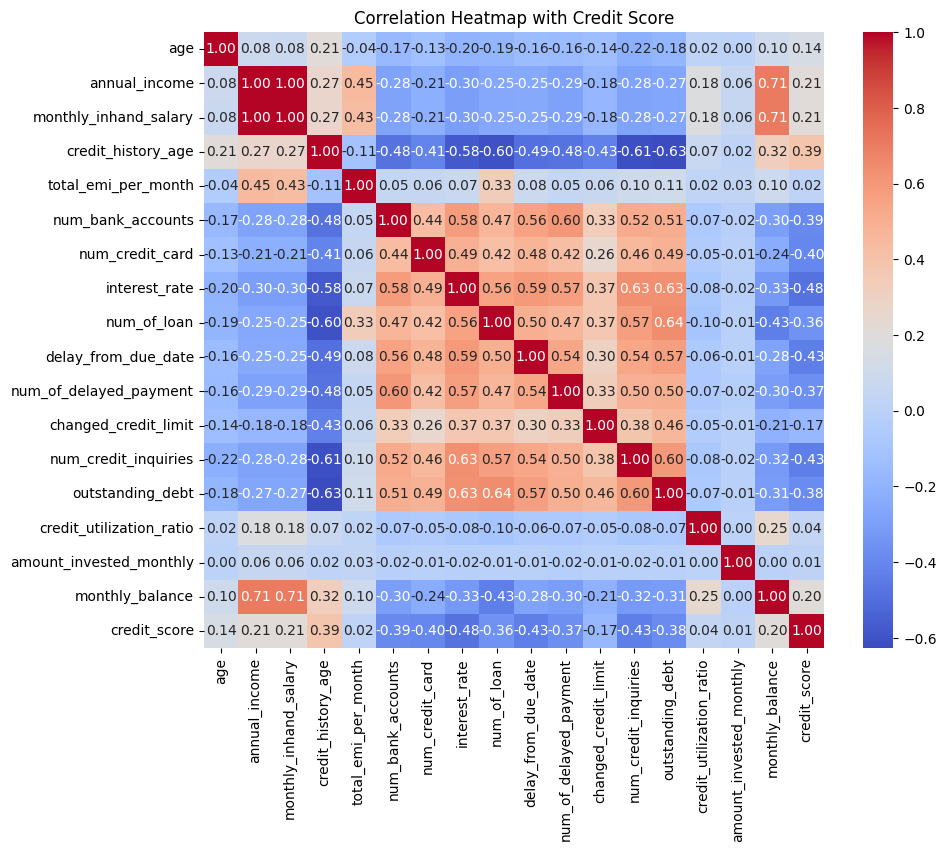

In [144]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

#Plotting
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap with Credit Score")
plt.show()

In [145]:
# List of unique loan values
unique_loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
                     'No Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']

# Adding a new column for each unique loan type and checking how many times it appears
for loan_type in unique_loan_types:
    # Replacing '-' and spaces with underscores, converting other characters to lowercase
    cleaned_loan_type = loan_type.replace(' ', '_').replace('-', '_').lower()

    # Counting how many times the loan_type value appears in each row
    df[cleaned_loan_type] = df['type_of_loan'].apply(lambda x: x.count(loan_type))

In [146]:
payment_mapping = {
    'High_spent_Large_value_payments': 6,#Successfully managing large debts provides the most positive contribution to the credit score.
    'High_spent_Medium_value_payments': 5, #Medium-value payments with high spending positively impact the credit score.
    'High_spent_Small_value_payments': 4, #Small payments can negatively affect the credit score if debts accumulate over time.
    'Low_spent_Large_value_payments': 3, #shows quick financial responsibility, positively affecting the credit score.
    'Low_spent_Medium_value_payments': 2, #contributes positively to the credit score by demonstrating debt management.
    'Low_spent_Small_value_payments': 1 #may limit the credit history and provide minimal contribution to the credit score
}


df['payment_behaviour'] = df['payment_behaviour'].map(payment_mapping)

df['payment_behaviour'] = pd.to_numeric(df['payment_behaviour'], downcast='integer')

In [147]:
# Convert the credit_mix column to numerical values
df['credit_mix'] = df['credit_mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

df['credit_mix'] = pd.to_numeric(df['credit_mix'], downcast='integer')

In [148]:
# Convert the payment_of_min_amount column to numerical values
df['payment_of_min_amount'] = df['payment_of_min_amount'].map({'Yes': 1, 'No': 0})

df['payment_of_min_amount'] = pd.to_numeric(df['payment_of_min_amount'], downcast='integer')

In [149]:
df = pd.get_dummies(df, columns=['occupation'], dtype='float')

In [150]:
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

#Mapping
df['month'] = df['month'].map(month_map)

df['month'] = pd.to_numeric(df['month'], downcast='integer')

In [151]:
df.to_csv('../data/credit_score_cleaned.csv', index=False)